# Predicting the Closing Stock Price of Costco - Assignment (U22892161)

In this notebook. we will predict the closing stock price on 10th day for a company called COSTCO.

To get our data, go to

https://finance.yahoo.com/quote/COST/history?period1=1649548800&period2=1682208000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

(which is the stock history of COSTCO company) and download stock data for the 1 year.I have Downlownded this data (it will be in csv format) and store it in your working directory (the directory this notebook is in).


## STEP 1: Importing and Install Python Libraries 

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Conv1D

np.random.seed(1)
tf.random.set_seed(1)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## STEP 2:  Read the Dataset

In [2]:
import pandas as pd

costco = pd.read_csv('C:/Users/Kavya Reddy Basupall/Downloads/COST (2).csv')

costco.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-11,598.789978,601.000000,582.799988,584.669983,580.653625,2792700
1,2022-04-12,586.690002,591.729980,578.760010,581.359985,577.366394,2142000
2,2022-04-13,582.469971,593.489990,582.469971,591.090027,587.029663,2211800
3,2022-04-14,591.780029,596.280029,587.049988,590.390015,586.334412,2206200
4,2022-04-18,585.380005,592.109985,579.599976,582.119995,578.121155,2161900


In [3]:
costco

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-11,598.789978,601.000000,582.799988,584.669983,580.653625,2792700
1,2022-04-12,586.690002,591.729980,578.760010,581.359985,577.366394,2142000
2,2022-04-13,582.469971,593.489990,582.469971,591.090027,587.029663,2211800
3,2022-04-14,591.780029,596.280029,587.049988,590.390015,586.334412,2206200
4,2022-04-18,585.380005,592.109985,579.599976,582.119995,578.121155,2161900
...,...,...,...,...,...,...,...
254,2023-04-17,492.769989,497.890015,491.149994,493.940002,493.940002,1411800
255,2023-04-18,496.100006,497.630005,494.119995,496.899994,496.899994,1339600
256,2023-04-19,497.130005,497.989990,493.829987,496.029999,496.029999,1098800
257,2023-04-20,495.750000,510.660004,495.510010,505.579987,505.579987,2936500


In [4]:
#Drop the columns we don't need
costco = costco.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [5]:
costco = costco[['Close']]  #our target column

In [6]:
costco

,Close
0,584.669983
1,581.359985
2,591.090027
3,590.390015
4,582.119995
...,...
254,493.940002
255,496.899994
256,496.029999
257,505.579987


In [7]:
costco.shape

(259, 1)

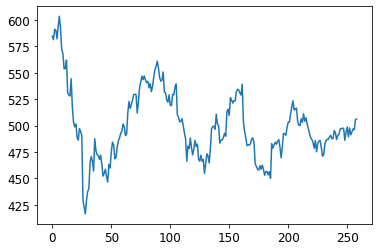

In [8]:
#Plot temp
plt.plot(costco['Close'])
plt.show()

## STEP 3:  Data Cleanup

In [9]:
costco['Close'].isna().sum() #checking for null vlaues

0

In [10]:
# Remove all null values

costco = costco.dropna().reset_index(drop=True)

In [11]:
row_count = costco.shape[0] # store the number of obersvations 
row_count

259

In [12]:
# to make things easier, we create a numpy array from our dataframe of prices
costco = costco.to_numpy() 
costco.shape

(259, 1)

In [13]:
sequence_length = 10  # here, lets create a variable to hold the number of days that will be in a sequence. This makes it easier to change later.

In [14]:
costco = costco[row_count % sequence_length: ] # Since our data may not be a multiple of sequence_length, we will ignore 
# the first number of days in order to make the total a number divisible by sequence length
costco.shape

(250, 1)

In [15]:
costco = costco.reshape(row_count // sequence_length, sequence_length) # note that temps are a multiple of sequence length, we can split the data into rows of sequence length.
costco

array([[568.210022, 553.76001 , 554.080017, 562.      , 531.719971,
        528.950012, 528.080017, 544.429993, 517.320007, 503.359985],
       [498.829987, 501.459991, 489.079987, 486.179993, 497.269989,
        494.529999, 490.470001, 429.399994, 422.929993, 416.429993],
       [429.480011, 437.709991, 440.109985, 464.98999 , 470.76001 ,
        466.220001, 456.98999 , 487.609985, 476.25    , 472.470001],
       [471.779999, 467.98999 , 472.049988, 463.309998, 452.25    ,
        454.799988, 458.790009, 451.76001 , 446.690002, 463.109985],
       [459.959991, 475.      , 484.369995, 481.75    , 468.609985,
        469.839996, 479.279999, 485.76001 , 488.26001 , 492.649994],
       [494.950012, 501.540009, 498.899994, 490.570007, 492.220001,
        511.940002, 522.950012, 516.299988, 520.22998 , 524.200012],
       [529.460022, 529.719971, 529.140015, 511.929993, 522.309998,
        536.179993, 541.299988, 546.809998, 543.460022, 547.01001 ],
       [543.280029, 540.669983, 541.90002

In [16]:
# Convert to dataframe

costco_df = pd.DataFrame(costco, columns=np.arange(0,10,1))
costco_df

,0,1,2,3,4,5,6,7,8,9
0,568.210022,553.760010,554.080017,562.000000,531.719971,528.950012,528.080017,544.429993,517.320007,503.359985
1,498.829987,501.459991,489.079987,486.179993,497.269989,494.529999,490.470001,429.399994,422.929993,416.429993
2,429.480011,437.709991,440.109985,464.989990,470.760010,466.220001,456.989990,487.609985,476.250000,472.470001
3,471.779999,467.989990,472.049988,463.309998,452.250000,454.799988,458.790009,451.760010,446.690002,463.109985
4,459.959991,475.000000,484.369995,481.750000,468.609985,469.839996,479.279999,485.760010,488.260010,492.649994
5,494.950012,501.540009,498.899994,490.570007,492.220001,511.940002,522.950012,516.299988,520.229980,524.200012
6,529.460022,529.719971,529.140015,511.929993,522.309998,536.179993,541.299988,546.809998,543.460022,547.010010
7,543.280029,540.669983,541.900024,535.820007,539.820007,532.200012,537.210022,545.750000,553.020020,556.320007
8,560.960022,554.530029,545.469971,542.070007,543.219971,550.770020,531.820007,531.059998,524.140015,522.099976
9,529.169983,519.109985,518.900024,529.640015,529.119995,536.580017,539.520020,510.299988,508.000000,503.500000


## STEP 4:  Reshape for Standardizing Data

In [17]:
# Let's create a single sequence (i.e., feature) for standardization

COSTCO = np.array(costco_df).ravel().reshape(-1,1)

COSTCO.shape

(250, 1)

In [18]:
COSTCO

array([[568.210022],
       [553.76001 ],
       [554.080017],
       [562.      ],
       [531.719971],
       [528.950012],
       [528.080017],
       [544.429993],
       [517.320007],
       [503.359985],
       [498.829987],
       [501.459991],
       [489.079987],
       [486.179993],
       [497.269989],
       [494.529999],
       [490.470001],
       [429.399994],
       [422.929993],
       [416.429993],
       [429.480011],
       [437.709991],
       [440.109985],
       [464.98999 ],
       [470.76001 ],
       [466.220001],
       [456.98999 ],
       [487.609985],
       [476.25    ],
       [472.470001],
       [471.779999],
       [467.98999 ],
       [472.049988],
       [463.309998],
       [452.25    ],
       [454.799988],
       [458.790009],
       [451.76001 ],
       [446.690002],
       [463.109985],
       [459.959991],
       [475.      ],
       [484.369995],
       [481.75    ],
       [468.609985],
       [469.839996],
       [479.279999],
       [485.7

## STEP 5: Standardize the values

In [19]:
# using StandardScaler to standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_std = scaler.fit_transform(COSTCO)

## STEP 6: Reshape the data back to 10-day format

In [20]:
#we have 250 rows of data so we can shape them as 25 rows with 10 columns
new_reshaped = new_std.reshape(25,10)

new_reshaped.shape

(25, 10)

In [21]:
#Pandas version of the reshaped data

pd.DataFrame(new_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,2.537940,2.028011,2.039303,2.318793,1.250236,1.152486,1.121785,1.698762,0.742073,0.249435
1,0.089575,0.182386,-0.254495,-0.356833,0.034524,-0.062168,-0.205442,-2.360553,-2.588874,-2.818254
2,-2.357730,-2.067300,-1.982606,-1.104611,-0.900992,-1.061205,-1.386925,-0.306370,-0.707255,-0.840648
3,-0.864997,-0.998744,-0.855470,-1.163897,-1.554195,-1.464208,-1.323403,-1.571486,-1.750403,-1.170955
4,-1.282116,-0.751366,-0.420707,-0.513164,-0.976865,-0.933458,-0.600328,-0.371654,-0.283431,-0.128512
5,-0.047346,0.185209,0.092045,-0.201913,-0.143686,0.552217,0.940751,0.706077,0.844763,0.984862
6,1.170484,1.179657,1.159191,0.551863,0.918165,1.407626,1.588307,1.782750,1.664532,1.789809
7,1.658181,1.566074,1.609481,1.394923,1.536079,1.267176,1.443975,1.745344,2.001897,2.118351
8,2.282093,2.055184,1.735462,1.615480,1.656061,1.922496,1.253766,1.226946,0.982745,0.910754
9,1.160249,0.805239,0.797830,1.176836,1.158485,1.421743,1.525493,0.494342,0.413177,0.254376


## STEP 7: Split the Data

In this case, we are using a chronological split as it is stock market data.

In [22]:
# create our X and y. 
# X will be the 9 days prior...
X = new_reshaped[:, :-1] # all rows, all columns except the last one
# y will be the 10th day (what we are trying to predict)
y = new_reshaped[:, -1] # all rows, only the last column

In [23]:
#splitting the data ito train and test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(17, 9, 1)
(8, 9, 1)


## STEP 8: Create dataframe to store results    

We are running 7 models in this notebook. We will store the results in a dataframe for easy comparison.

In [25]:
df_results = pd.DataFrame({'model': [], 'mean_squared_error': []})

## STEP 9: Pre defining the values which we use in all models

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Conv1D

n_steps = sequence_length - 1
n_inputs = 1
monitor='val_root_mean_squared_error'
activation=None
loss="mean_squared_error"
metrics=[tf.keras.metrics.RootMeanSquaredError()]

### STEP 10: APPLYING VARIED MODELS TO THE GIVEN DATA 

## Simple RNN

In [27]:
model = Sequential(
    [
        SimpleRNN(10, input_shape=[n_steps, n_inputs]),
        Dense(1, activation=activation)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(
    loss=loss, 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=10, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 1s 771ms/step - loss: 0.8226 - root_mean_squared_error: 0.9070 - val_loss: 0.4107 - val_root_mean_squared_error: 0.6409
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 0.7938 - root_mean_squared_error: 0.8910 - val_loss: 0.3939 - val_root_mean_squared_error: 0.6276
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 0.7720 - root_mean_squared_error: 0.8787 - val_loss: 0.3774 - val_root_mean_squared_error: 0.6143
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 0.7501 - root_mean_squared_error: 0.8661 - val_loss: 0.3612 - val_root_mean_squared_error: 0.6010
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 0.7281 - root_mean_squared_error: 0.8533 - val_loss: 0.3453 - val_root_mean_squared_error: 0.5877
Epoch 6/50
1/1 [==============================] - 0s 29ms/step - loss: 0.7061 - root_mean_squared_error: 0.8403 - val_loss: 0.3301 - val_root_mean_squared

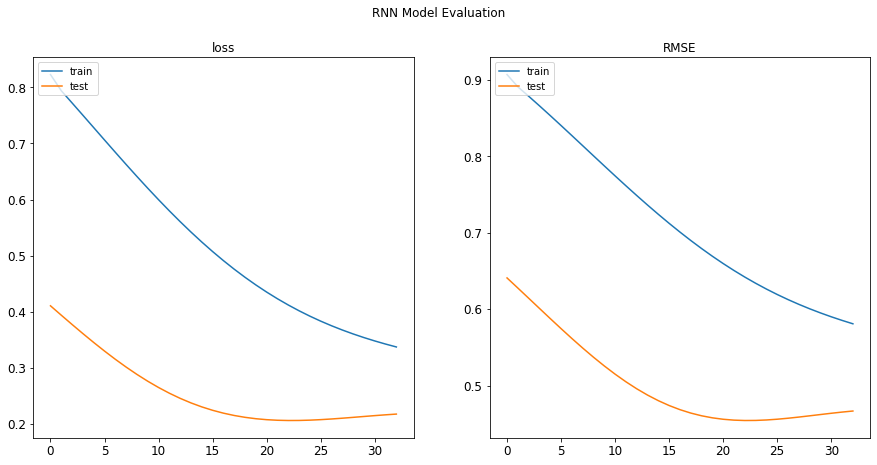

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('RNN Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

### Predictions

In [31]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)


1/1 [==============================] - 0s 89ms/step


In [32]:
#lets create a data frame which will shows us the actual and the predicted values 
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [33]:
comparison

,actual,predicted
0,533.659973,518.927612
1,513.130005,483.604004
2,481.399994,477.538391
3,463.109985,463.932281
4,479.519989,479.814667
5,478.980011,467.090637
6,490.880005,482.871918
7,503.809998,513.259216


In [34]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(comparison['actual'], comparison['predicted'])
mse

174.90957165522093

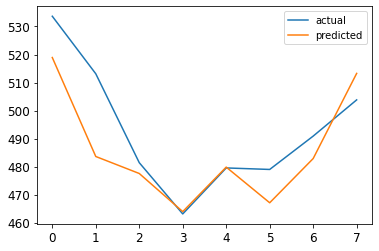

In [35]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

Here we can clearly see the actual and predicting values for closing stock price using simple RNN, which are not similar.

In [36]:
df_result = pd.DataFrame(
    {
        'model': ['RNN'], 
        'mean_squared_error': mse
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

## Deep RNN
Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training.

Since the last layer is DENSE, it can't take sequence data. Therefore, you CANNOT return sequences from the previous layer. So, remove return_sequences from previous layer.

In [37]:
n_steps = sequence_length - 1
n_inputs = 1


model = keras.models.Sequential(
    [
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[n_steps, n_inputs]),
        keras.layers.SimpleRNN(10, return_sequences=True),
        keras.layers.SimpleRNN(20, return_sequences=False), 
        keras.layers.Dense(1, activation=activation)
    ]
)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    loss=loss, 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)

In [39]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta=0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data = (X_test, y_test), 
    callbacks=[early_stop]
)  

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.2967 - root_mean_squared_error: 0.9754 - val_loss: 0.6096 - val_root_mean_squared_error: 0.7808
Epoch 2/50
1/1 [==============================] - 0s 67ms/step - loss: 1.1666 - root_mean_squared_error: 1.0801 - val_loss: 0.4963 - val_root_mean_squared_error: 0.7045
Epoch 3/50
1/1 [==============================] - 0s 67ms/step - loss: 1.0452 - root_mean_squared_error: 1.0223 - val_loss: 0.3858 - val_root_mean_squared_error: 0.6211
Epoch 4/50
1/1 [==============================] - 0s 63ms/step - loss: 0.9237 - root_mean_squared_error: 0.9611 - val_loss: 0.2893 - val_root_mean_squared_error: 0.5378
Epoch 5/50
1/1 [==============================] - 0s 70ms/step - loss: 0.8105 - root_mean_squared_error: 0.9003 - val_loss: 0.2167 - val_root_mean_squared_error: 0.4655
Epoch 6/50
1/1 [==============================] - 0s 70ms/step - loss: 0.7142 - root_mean_squared_error: 0.8451 - val_loss: 0.1692 - val_root_mean_squared_er

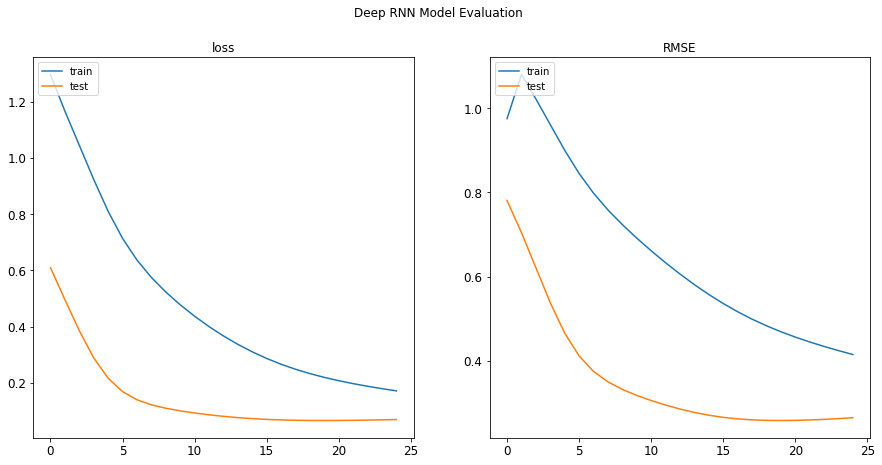

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Deep RNN Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### Predictions

In [41]:
#Predict:
y_pred = model.predict(X_test)


1/1 [==============================] - 0s 483ms/step


In [42]:
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [43]:
comparison

,actual,predicted
0,533.659973,530.028992
1,513.130005,493.947845
2,481.399994,480.998352
3,463.109985,465.071136
4,479.519989,480.079315
5,478.980011,480.872894
6,490.880005,490.850891
7,503.809998,511.570099


In [44]:
mse_2=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_2

56.15782092308489

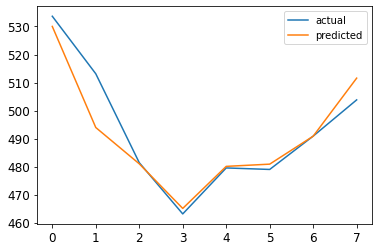

In [45]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

Here, the actual and predicting values for this model are sort of okay.

In [46]:
df_result = pd.DataFrame(
    {
        'model': ['Deep RNN'], 
        'mean_squared_error': mse_2
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

## LSTM with one layer


In [47]:
model = keras.models.Sequential(
    [
        keras.layers.LSTM(10, input_shape=[n_steps, n_inputs]),
        keras.layers.Dense(1, activation=activation)
    ]
)

In [48]:
model.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


### Calculate the number of paramaters for the model


In [49]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
) 

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.0654 - root_mean_squared_error: 0.8642 - val_loss: 0.4752 - val_root_mean_squared_error: 0.6894
Epoch 2/50
1/1 [==============================] - 0s 69ms/step - loss: 1.0525 - root_mean_squared_error: 1.0259 - val_loss: 0.4680 - val_root_mean_squared_error: 0.6841
Epoch 3/50
1/1 [==============================] - 0s 67ms/step - loss: 1.0430 - root_mean_squared_error: 1.0213 - val_loss: 0.4606 - val_root_mean_squared_error: 0.6787
Epoch 4/50
1/1 [==============================] - 0s 64ms/step - loss: 1.0333 - root_mean_squared_error: 1.0165 - val_loss: 0.4531 - val_root_mean_squared_error: 0.6731
Epoch 5/50
1/1 [==============================] - 0s 72ms/step - loss: 1.0232 - root_mean_squared_error: 1.0115 - val_loss: 0.4454 - val_root_mean_squared_error: 0.6674
Epoch 6/50
1/1 [==============================] - 0s 62ms/step - loss: 1.0129 - root_mean_squared_error: 1.0065 - val_loss: 0.4377 - val_root_mean_squared_er

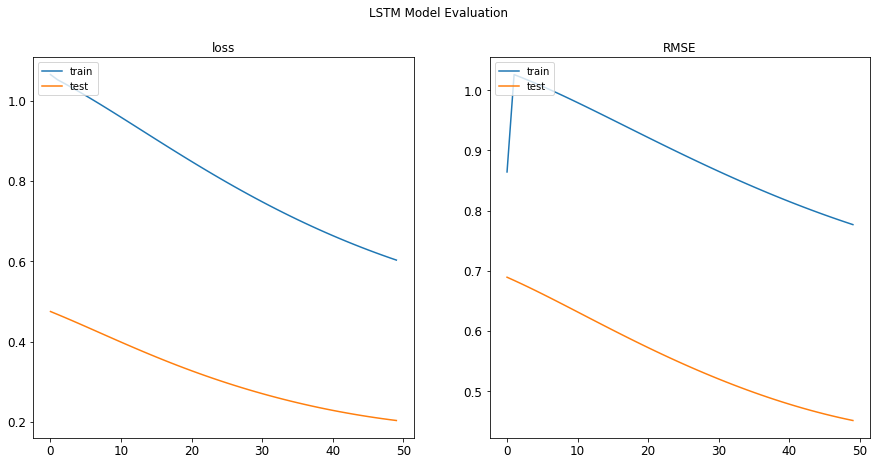

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('LSTM Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### Predictions


In [51]:
#Predict:
y_pred = model.predict(X_test)


1/1 [==============================] - 1s 564ms/step


In [52]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [53]:
mse_3=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_3

163.6359364066576

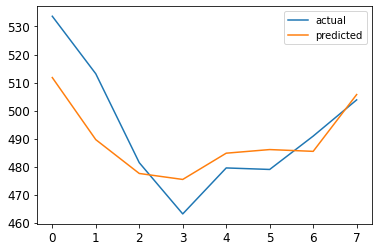

In [54]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [55]:
df_result = pd.DataFrame(
    {
        'model': ['LSTM with one layer'], 
        'mean_squared_error': mse_3
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

## LSTM with more layers

In [56]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.LSTM(20),
    keras.layers.Dense(1, activation=activation)
])

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    metrics=metrics
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 9, 20)             1760      
                                                                 
 lstm_2 (LSTM)               (None, 9, 20)             3280      
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


### Calculate the number of paramaters for the model


In [58]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 1.2705 - root_mean_squared_error: 0.9639 - val_loss: 0.5667 - val_root_mean_squared_error: 0.7528
Epoch 2/50
1/1 [==============================] - 0s 84ms/step - loss: 1.2589 - root_mean_squared_error: 1.1220 - val_loss: 0.5590 - val_root_mean_squared_error: 0.7476
Epoch 3/50
1/1 [==============================] - 0s 85ms/step - loss: 1.2481 - root_mean_squared_error: 1.1172 - val_loss: 0.5509 - val_root_mean_squared_error: 0.7422
Epoch 4/50
1/1 [==============================] - 0s 83ms/step - loss: 1.2369 - root_mean_squared_error: 1.1121 - val_loss: 0.5425 - val_root_mean_squared_error: 0.7365
Epoch 5/50
1/1 [==============================] - 0s 80ms/step - loss: 1.2252 - root_mean_squared_error: 1.1069 - val_loss: 0.5338 - val_root_mean_squared_error: 0.7306
Epoch 6/50
1/1 [==============================] - 0s 81ms/step - loss: 1.2130 - root_mean_squared_error: 1.1014 - val_loss: 0.5247 - val_root_mean_squared_

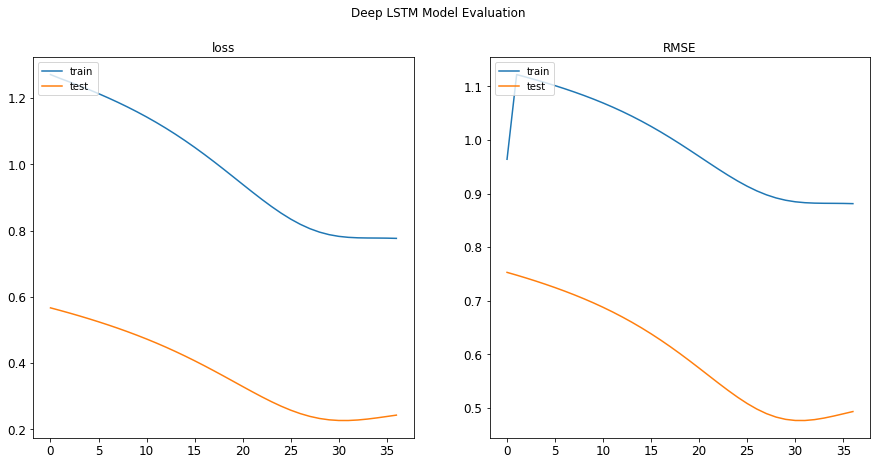

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Deep LSTM Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### Predictions


In [60]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [61]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [62]:
mse_4=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_4

195.18913828902927

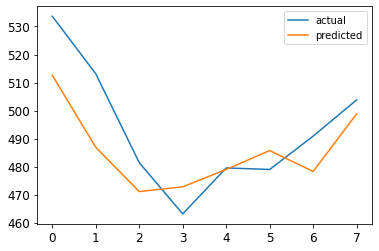

In [63]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [64]:
df_result = pd.DataFrame(
    {
        'model': ['Deep LSTM '], 
        'mean_squared_error': mse_4
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

## GRU with one layer


In [65]:
model = keras.models.Sequential([
    keras.layers.GRU(15, input_shape=[n_steps, n_inputs]),
    keras.layers.Dense(1, activation=activation)
])

In [66]:
model.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15)                810       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


### Calculate the number of paramaters for the model

In [67]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.6642 - root_mean_squared_error: 0.7276 - val_loss: 0.2648 - val_root_mean_squared_error: 0.5146
Epoch 2/50
1/1 [==============================] - 0s 63ms/step - loss: 0.6489 - root_mean_squared_error: 0.8055 - val_loss: 0.2592 - val_root_mean_squared_error: 0.5091
Epoch 3/50
1/1 [==============================] - 0s 67ms/step - loss: 0.6378 - root_mean_squared_error: 0.7986 - val_loss: 0.2536 - val_root_mean_squared_error: 0.5036
Epoch 4/50
1/1 [==============================] - 0s 63ms/step - loss: 0.6264 - root_mean_squared_error: 0.7915 - val_loss: 0.2480 - val_root_mean_squared_error: 0.4979
Epoch 5/50
1/1 [==============================] - 0s 66ms/step - loss: 0.6147 - root_mean_squared_error: 0.7841 - val_loss: 0.2423 - val_root_mean_squared_error: 0.4922
Epoch 6/50
1/1 [==============================] - 0s 69ms/step - loss: 0.6029 - root_mean_squared_error: 0.7764 - val_loss: 0.2366 - val_root_mean_squared_er

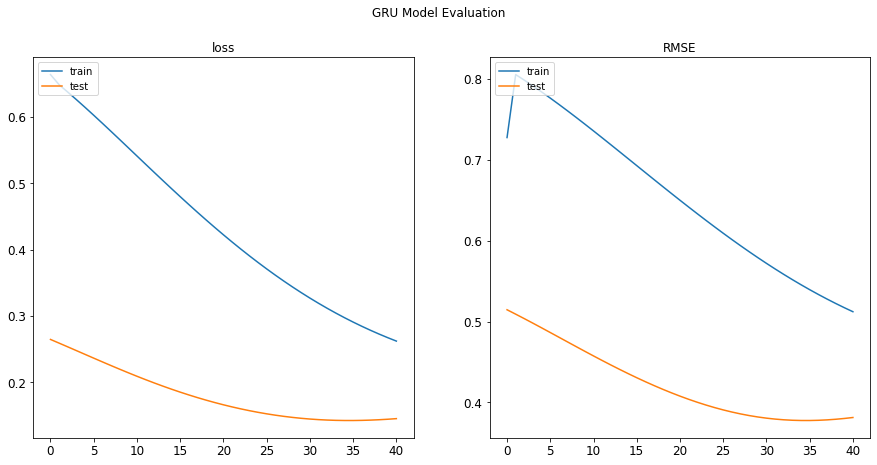

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('GRU Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### Predictions


In [69]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 524ms/step


In [70]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [71]:
mse_5=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_5

116.74729940279065

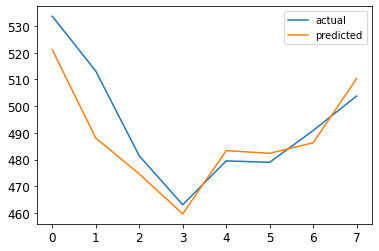

In [72]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [73]:
df_result = pd.DataFrame(
    {
        'model': ['Gru with one layer'], 
        'mean_squared_error': mse_5
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

## GRU with more layers


In [74]:
model = keras.models.Sequential([
    keras.layers.GRU(10, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.GRU(10, return_sequences=True),
    keras.layers.GRU(10),
    keras.layers.Dense(1, activation=activation)
])

In [75]:
model.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=metrics
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 9, 10)             390       
                                                                 
 gru_2 (GRU)                 (None, 9, 10)             660       
                                                                 
 gru_3 (GRU)                 (None, 10)                660       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


### Calculate the number of paramaters for the model

In [76]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop] # we defined this early_stop callback function earlier
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 1.2732 - root_mean_squared_error: 0.9551 - val_loss: 0.5932 - val_root_mean_squared_error: 0.7702
Epoch 2/50
1/1 [==============================] - 0s 86ms/step - loss: 1.2571 - root_mean_squared_error: 1.1212 - val_loss: 0.5826 - val_root_mean_squared_error: 0.7633
Epoch 3/50
1/1 [==============================] - 0s 81ms/step - loss: 1.2429 - root_mean_squared_error: 1.1148 - val_loss: 0.5718 - val_root_mean_squared_error: 0.7562
Epoch 4/50
1/1 [==============================] - 0s 87ms/step - loss: 1.2281 - root_mean_squared_error: 1.1082 - val_loss: 0.5608 - val_root_mean_squared_error: 0.7489
Epoch 5/50
1/1 [==============================] - 0s 86ms/step - loss: 1.2129 - root_mean_squared_error: 1.1013 - val_loss: 0.5496 - val_root_mean_squared_error: 0.7413
Epoch 6/50
1/1 [==============================] - 0s 90ms/step - loss: 1.1970 - root_mean_squared_error: 1.0941 - val_loss: 0.5381 - val_root_mean_squared_

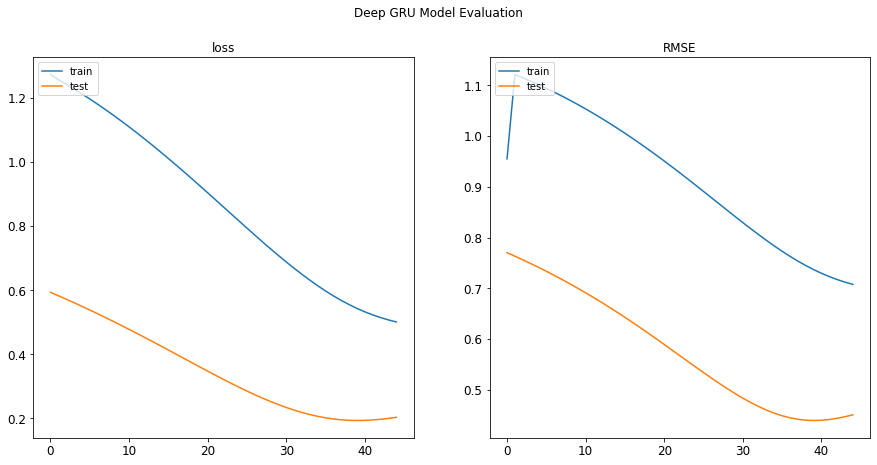

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Deep GRU Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### Predictions

In [78]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [79]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [80]:
mse_6=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_6

163.03548242082456

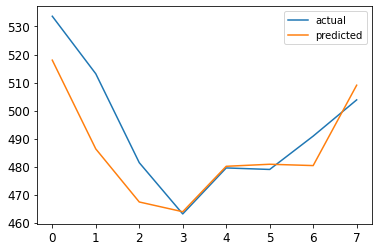

In [81]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [82]:
df_result = pd.DataFrame(
    {
        'model': ['Deep GRU'], 
        'mean_squared_error': mse_6
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

## Conv1D

In [83]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=10, kernel_size=3, strides=1, padding="valid", input_shape=[n_steps, n_inputs]),
    keras.layers.Conv1D(filters=15, kernel_size=3, strides=1, padding="valid"),
    keras.layers.LSTM(10, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation=activation)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 10)             40        
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 15)             465       
                                                                 
 lstm_4 (LSTM)               (None, 5, 10)             1040      
                                                                 
 lstm_5 (LSTM)               (None, 32)                5504      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,082
Trainable params: 7,082
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(
    loss=loss, 
    optimizer=keras.optimizers.Nadam(learning_rate=0.010), 
    metrics=metrics
)

In [85]:
import time
start_time = time.time()

early_stop = EarlyStopping(monitor=monitor, min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop] 
)

end_time = time.time()

Epoch 1/50
1/1 [==============================] - 9s 9s/step - loss: 1.2748 - root_mean_squared_error: 0.9653 - val_loss: 0.4647 - val_root_mean_squared_error: 0.6817
Epoch 2/50
1/1 [==============================] - 0s 69ms/step - loss: 1.1044 - root_mean_squared_error: 1.0509 - val_loss: 0.3578 - val_root_mean_squared_error: 0.5982
Epoch 3/50
1/1 [==============================] - 0s 78ms/step - loss: 0.9492 - root_mean_squared_error: 0.9743 - val_loss: 0.2617 - val_root_mean_squared_error: 0.5116
Epoch 4/50
1/1 [==============================] - 0s 73ms/step - loss: 0.7974 - root_mean_squared_error: 0.8930 - val_loss: 0.2183 - val_root_mean_squared_error: 0.4673
Epoch 5/50
1/1 [==============================] - 0s 75ms/step - loss: 0.7072 - root_mean_squared_error: 0.8410 - val_loss: 0.2525 - val_root_mean_squared_error: 0.5025
Epoch 6/50
1/1 [==============================] - 0s 76ms/step - loss: 0.6785 - root_mean_squared_error: 0.8237 - val_loss: 0.2727 - val_root_mean_squared_er

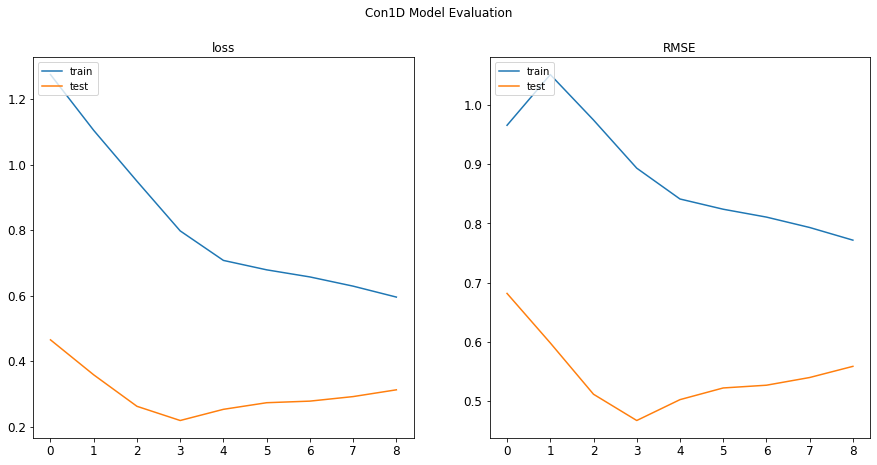

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Con1D Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

plt.show()

### Predictions

In [87]:
#Predict:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [88]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([y_test]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [89]:
mse_7=mean_squared_error(comparison['actual'], comparison['predicted'])
mse_7

250.58790193571198

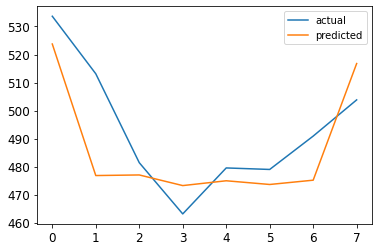

In [90]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [91]:
df_result = pd.DataFrame(
    {
        'model': ['CONV1D'], 
        'mean_squared_error': mse_7
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

In [92]:
df_results.sort_values(by=['mean_squared_error'], ascending=True)

,model,mean_squared_error
1,Deep RNN,56.157821
4,Gru with one layer,116.747299
5,Deep GRU,163.035482
2,LSTM with one layer,163.635936
0,RNN,174.909572
3,Deep LSTM,195.189138
6,CONV1D,250.587902


## CONCLUSION :

1.From the above summary table, it is evident that the root mean square error value for Deep RNN is comparatively low to other models, so this Deep RNN model is used best to predict the closing price.

2.Deep RNN fits the model values closely and predicts the next day closing value clearly.

3.LSTM with single layer has high Root mean square, it is not a good model to predict the values along with RNN and Deep LSTM.

4.Therefore, Deep Recurrent Neural Network is the best fit model in predicting the tenth day stock price for Costco.

